# Config

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches



In [3]:
YEAR = 2024

# Read Data

In [4]:
gdf = gpd.read_parquet(f'../data/predicted_AADBT_XGBoost-TFM-{YEAR}.parquet')
print(gdf.shape)
print(gdf.columns)

(2913, 8)
Index(['id', 'original_id', 'Predicted_AADBT_AB', 'Predicted_AADBT_BA',
       'Total_AADBT', 'geometry', 'AADBT_categorized', 'Total_AADBT_capped'],
      dtype='object')


# Process data


In [5]:
# get only last year 
gdf = gdf.to_crs(epsg=4326)

# Metrics

In [7]:
gdf["AADBT_categorized"].value_counts()

AADBT_categorized
1000-2000    1165
0-1000       1064
2000-3000     500
3000-4000     152
4000-5000      29
5000+           3
Name: count, dtype: int64

# Visualize data

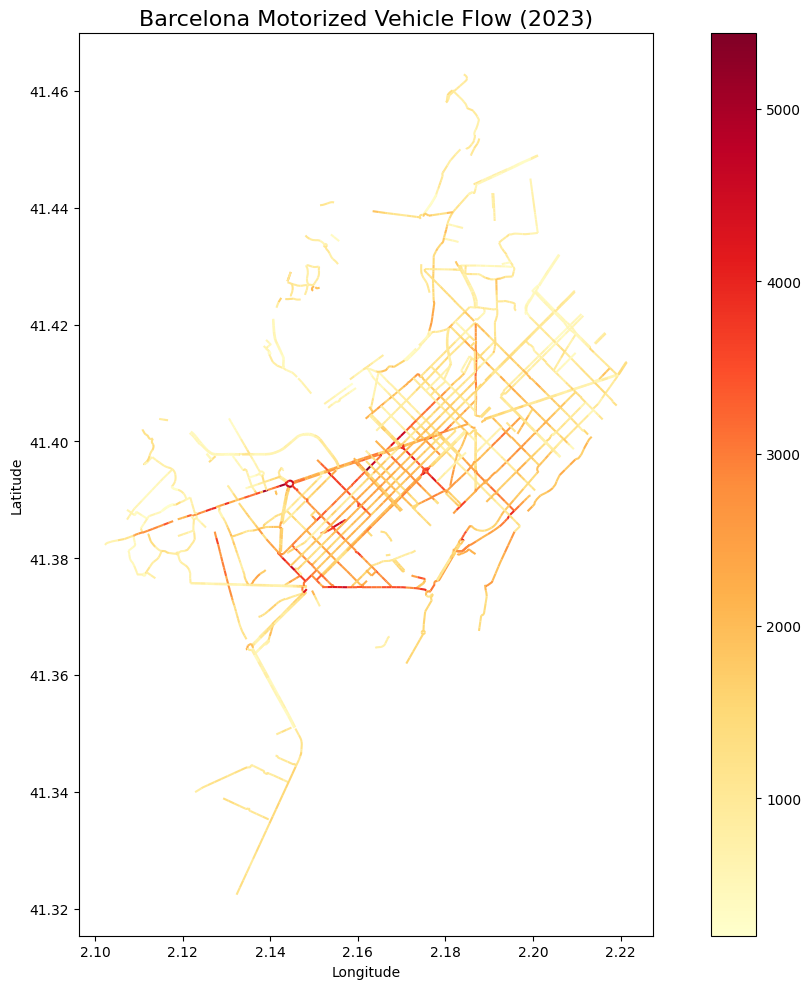

In [7]:

gdf.plot(
    column='Total_AADBT',
    legend=True,
    figsize=(12, 10),
    markersize=5,
    cmap='YlOrRd'
)
plt.title('Barcelona Motorized Vehicle Flow (2023)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# Save data



In [8]:
gdf.to_crs(epsg=4326, inplace=True)  # Convert to WGS84 for GeoJSON compatibility
gdf.to_file(
    f"../data/imd_bicycles_{YEAR}.geojson", driver='GeoJSON', index=False)
